In [1]:
from numpy import array
a = array([1, 2, 3, 4])
a

array([1, 2, 3, 4])

In [2]:
a + 2

array([3, 4, 5, 6])

In [3]:
a + a

array([2, 4, 6, 8])

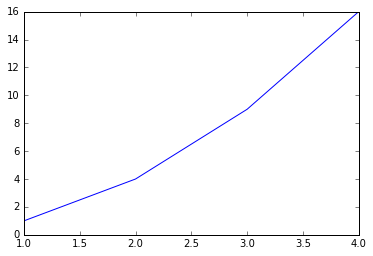

In [4]:
%matplotlib inline
from matplotlib.pyplot import plot
plot(a, a**2)

In [5]:
path = 'usa_gov_data.dat'
open(path).readline()

'{"h":"23QsddB","g":"23QsddC","l":"cdcsocialmedia","hh":"1.usa.gov","u":"http://wwwnc.cdc.gov/travel/page/Zika-travel-information","r":"direct","a":"Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1","i":"","t":1458026502,"k":"","nk":0,"hc":1454806987,"_id":"fcc609f4-e65f-40a8-988b-5ed15d53493c","c":"FR","tz":"Europe/Paris","ll":[48.86,2.35]}\n'

In [6]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'_id': 'fcc609f4-e65f-40a8-988b-5ed15d53493c',
 'a': 'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1',
 'c': 'FR',
 'g': '23QsddC',
 'h': '23QsddB',
 'hc': 1454806987,
 'hh': '1.usa.gov',
 'i': '',
 'k': '',
 'l': 'cdcsocialmedia',
 'll': [48.86, 2.35],
 'nk': 0,
 'r': 'direct',
 't': 1458026502,
 'tz': 'Europe/Paris',
 'u': 'http://wwwnc.cdc.gov/travel/page/Zika-travel-information'}

In [7]:
records[0]['tz']

'Europe/Paris'

In [8]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['Europe/Paris',
 'Europe/Paris',
 'Europe/Paris',
 'Europe/Paris',
 'America/Vancouver',
 'Europe/Paris',
 'Europe/Rome',
 'America/Chicago',
 'America/New_York',
 'Asia/Hong_Kong']

In [9]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
frame

,_id,a,al,c,cy,dp,g,gr,h,hc,...,kw,l,ll,mc,nk,r,sl,t,tz,u
0,fcc609f4-e65f-40a8-988b-5ed15d53493c,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0)...,NaN,FR,NaN,NaN,23QsddC,NaN,23QsddB,1454806987,...,NaN,cdcsocialmedia,"[48.86, 2.35]",NaN,0,direct,NaN,1458026502,Europe/Paris,http://wwwnc.cdc.gov/travel/page/Zika-travel-i...
1,a53581f7-5f9c-57a5-bc01-45f89f206c5f,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0)...,NaN,FR,NaN,NaN,6QOzgP,NaN,20mwfWB,1455042007,...,NaN,anonymous,"[48.86, 2.35]",NaN,0,direct,20mwfWB,1458026502,Europe/Paris,http://www.ninds.nih.gov/disorders/microcephal...
2,48f71604-2c6d-bd50-475b-3cf44f0aa0e4,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0)...,NaN,FR,NaN,NaN,1Pf79sL,NaN,1JlKlFc,1453406785,...,NaN,cdcsocialmedia,"[48.86, 2.35]",NaN,0,direct,NaN,1458026502,Europe/Paris,http://www.cdc.gov/zika/pregnancy/index.html
3,8ed784ea-f35c-41f0-b0eb-d338a3b086ce,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0)...,NaN,FR,NaN,NaN,6QOzgP,NaN,20mwfWB,1455042007,...,NaN,anonymous,"[48.86, 2.35]",NaN,0,direct,20mwfWB,1458026504,Europe/Paris,http://www.ninds.nih.gov/disorders/microcephal...
4,443bc092-ea63-f48a-c808-b8c2e5538951,Mozilla/5.0 (Linux; Android 5.0; SM-G900V Buil...,NaN,US,NaN,NaN,1LWNCMo,NaN,1P4clcc,1457717737,...,NaN,hrsagov,"[38, -97]",NaN,0,http://m.facebook.com/,NaN,1458026505,NaN,http://www.hhs.gov/about/news/2016/03/11/hhs-a...
5,dc635c57-02ff-f50c-0588-22ae0d75126f,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,NaN,CA,Vancouver,NaN,1VyHRoU,BC,1VyHRoT,1441281164,...,NaN,nmusafmup,"[49.2397, -123.0407]",NaN,0,direct,NaN,1458026506,America/Vancouver,http://www.nationalmuseum.af.mil/Visit/MuseumE...
6,5ded79cf-d3ae-2c33-eda6-abca7903c27c,Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0)...,NaN,FR,NaN,NaN,1PPwBPS,NaN,1UoBLGt,1453822892,...,NaN,anonymous,"[48.86, 2.35]",NaN,0,direct,1UoBLGt,1458026508,Europe/Paris,http://directorsblog.nih.gov/2016/01/26/zika-v...
7,d6b05b44-042b-b0d8-0f9e-514a09eb8bd4,Mozilla/5.0 (Linux; Android 4.4.4; SM-J100H Bu...,en-US,IT,NaN,NaN,1SKFGiG,NaN,1SKFGiF,1457885232,...,NaN,anonymous,"[42.8333, 12.8333]",NaN,0,http://m.facebook.com/,1SKFGiF,1458026510,Europe/Rome,http://www.niaid.nih.gov/news/newsreleases/201...
8,660f4617-1c7c-b92e-61a5-c4ddafc59087,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,en-US,US,Osceola,NaN,aTT1pk,WI,1SNxRpk,1448060250,...,NaN,ejcruz,"[45.277, -92.6306]",613,0,direct,NaN,1458026510,America/Chicago,http://www.hrsa.gov/loanscholarships/repayment...
9,bbda490f-cdfc-4578-388a-8f75a58ad1d4,Mozilla/5.0 (Linux; Android 6.0.1; SM-G930V Bu...,en-US,US,Milford,NaN,22dEE1m,OH,1QQbnEP,1457922495,...,NaN,anonymous,"[39.1659, -84.2295]",515,0,http://m.facebook.com/,1QQbnEP,1458026511,America/New_York,http://www.stripes.com/news/special-reports/op...


In [10]:
frame['tz'][:10]

0         Europe/Paris
1         Europe/Paris
2         Europe/Paris
3         Europe/Paris
4                  NaN
5    America/Vancouver
6         Europe/Paris
7          Europe/Rome
8      America/Chicago
9     America/New_York
Name: tz, dtype: object

In [11]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       19
Europe/Paris           16
Europe/Berlin          11
Asia/Chongqing          8
America/Los_Angeles     7
America/Chicago         7
Europe/London           6
Europe/Rome             4
America/Vancouver       2
Asia/Jerusalem          2
Name: tz, dtype: int64

In [12]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       19
Europe/Paris           16
Europe/Berlin          11
Asia/Chongqing          8
America/Chicago         7
America/Los_Angeles     7
Europe/London           6
Missing                 5
Europe/Rome             4
Asia/Jerusalem          2
Name: tz, dtype: int64

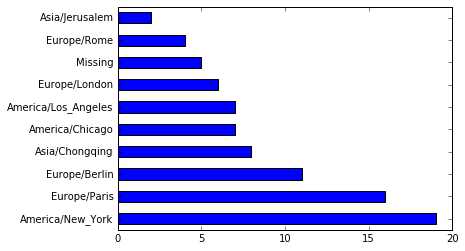

In [13]:
tz_counts[:10].plot(kind='barh', rot=0)

In [14]:
frame['a'][1]

'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:15.0) Gecko/20100101 Firefox/15.0.1'

In [15]:
frame["a"][50]

'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.8.0.10) Gecko/20070409 CentOS/1.5.0.10-2.el5.centos Firefox/1.5.0.10'

In [16]:
frame['a'][51]

'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.2; WOW64; Trident/6.0)'

In [17]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0    Mozilla/5.0
1    Mozilla/5.0
2    Mozilla/5.0
3    Mozilla/5.0
4    Mozilla/5.0
dtype: object

In [18]:
results.value_counts()[:8]

Mozilla/5.0    108
Mozilla/4.0      3
Opera/9.80       1
dtype: int64

In [19]:
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
operating_system[:5]

array(['Not Windows', 'Not Windows', 'Not Windows', 'Not Windows',
       'Not Windows'], 
      dtype='<U11')

In [20]:
by_tz_os = cframe.groupby(['tz',operating_system])
agg_count = by_tz_os.size().unstack().fillna(0)
agg_count[:10]

,Not Windows,Windows
tz,,
Africa/Lagos,2,0
America/Anchorage,1,0
America/Argentina/Buenos_Aires,1,0
America/Bogota,1,0
America/Chicago,3,4
America/Indianapolis,0,1
America/Los_Angeles,5,2
America/New_York,10,9
America/Phoenix,0,1


In [21]:
indexer = agg_count.sum(1).argsort()
indexer[:10]

tz
Africa/Lagos                      15
America/Anchorage                 27
America/Argentina/Buenos_Aires    26
America/Bogota                    24
America/Chicago                   22
America/Indianapolis              21
America/Los_Angeles               20
America/New_York                  19
America/Phoenix                   18
America/Vancouver                 17
dtype: int64

In [22]:
count_subset = agg_count.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
Asia/Calcutta,0,2
Asia/Jerusalem,2,0
Europe/Rome,3,1
Europe/London,6,0
America/Los_Angeles,5,2
America/Chicago,3,4
Asia/Chongqing,0,8
Europe/Berlin,10,1
Europe/Paris,16,0


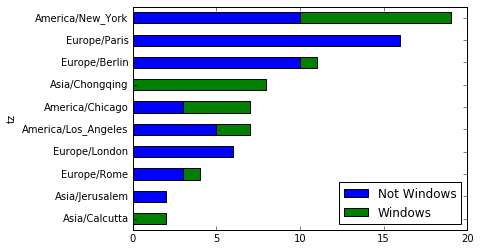

In [23]:
count_subset.plot(kind='barh', stacked=True)

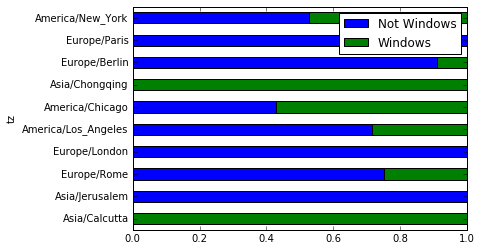

In [24]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)